In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

from collections import Counter

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K

#one-hot encoding
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix, f1_score

#Data augmentation
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, ReduceLROnPlateau


Using TensorFlow backend.


In [2]:
train_data = pd.read_csv(r'D:\ML\python\MNIST\train.csv')
test = pd.read_csv(r'D:\ML\python\MNIST\test.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(28000, 784)

In [4]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


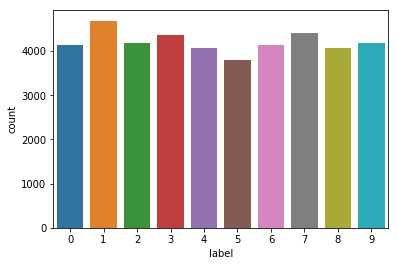

In [5]:
sns.countplot(train_data['label'])

In [6]:
print(train_data.shape)

(42000, 785)


In [7]:
x_train = train_data.drop(labels = 'label', axis=1)
y_train = train_data['label']

In [8]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [10]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
x_train = x_train / 255

In [12]:
test = test / 255

In [13]:
x_train.shape

(42000, 784)

In [14]:
x_train = x_train.values.reshape([x_train.shape[0], 28, 28, 1])

In [15]:
test = test.values.reshape([test.shape[0], 28, 28, 1])

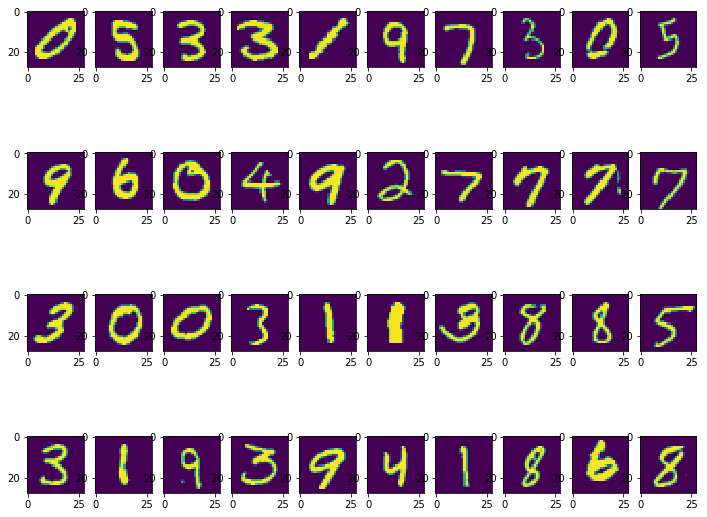

In [16]:
plt.figure(figsize=(12, 10))
x, y = 10, 4
np.random.seed(10)
for i in range(40):
    j = np.random.randint(1, 40000)
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[j].reshape((28, 28)), interpolation='nearest')
plt.show()

# label Encoding

In [17]:
y_train = to_categorical(y_train, num_classes=10)
#この操作を二回以上するとラベルが0,1のみになるため注意

In [18]:
y_train.shape

(42000, 10)

In [19]:
y_train[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Model

In [21]:
input_shape = (28, 28, 1)
batch_size = 64
epochs = 20
num_classes = 10

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
optimizer=RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

In [42]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=0.0001)
callbacks = [ 
    keras.callbacks.EarlyStopping(
        monitor = 'val_loss', 
        min_delta=0.1, 
        patience=100, 
        verbose=1)
]

In [43]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    zoom_range=[0.9, 1.1], 
    horizontal_flip=False, 
    vertical_flip=False)
#数字の反転は今回起こりえないため、除去

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [32]:
datagen.fit(x_train)

In [33]:
h = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                        epochs=epochs, 
                        validation_data=(x_test, y_test), 
                        verbose=1, 
                        steps_per_epoch=x_train.shape[0] // batch_size, 
                        callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
590/590 [==============================] - 22s 37ms/step - loss: 0.3933 - acc: 0.8773 - val_loss: 0.0535 - val_acc: 0.9819
Epoch 2/20
590/590 [==============================] - 11s 18ms/step - loss: 0.1218 - acc: 0.9628 - val_loss: 0.0501 - val_acc: 0.9838
Epoch 3/20
590/590 [==============================] - 11s 18ms/step - loss: 0.0940 - acc: 0.9708 - val_loss: 0.0456 - val_acc: 0.9860
Epoch 4/20
590/590 [==============================] - 11s 18ms/step - loss: 0.0816 - acc: 0.9752 - val_loss: 0.0440 - val_acc: 0.9862
Epoch 5/20
590/590 [==============================] - 11s 18ms/step - loss: 0.0705 - acc: 0.9786 - val_loss: 0.0397 - val_acc: 0.9879
Epoch 6/20
590/590 [==============================] - 11s 18ms/step - loss: 0.0626 - acc: 0.9804 - val_loss: 0.0279 - val_acc: 0.9919
Epoch 7/20
590/590 [==============================] - 11s 18ms/step - loss: 0.0612 - acc: 0.9813 - val_loss: 0.0451 - val_acc: 0.9871
Epoch 8/20
590

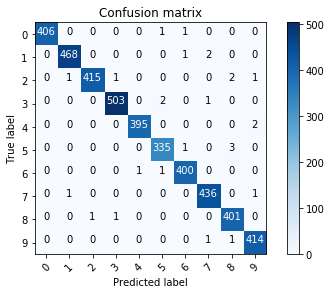

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

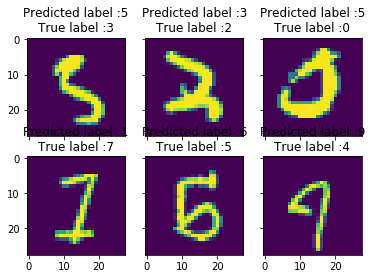

In [36]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [37]:
predicted_classes = model.predict_classes(test)

In [38]:
predicted_classes[:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3], dtype=int64)

In [39]:
submissions = pd.DataFrame({'ImageID' : list(range(1, len(predicted_classes)+1)), 
                            'Label' : predicted_classes})
submissions.to_csv(r'D:\ML\python\MNIST\nkt02.csv', index=False, header=True)

In [ ]:
model.save(r'D:\ML\python\MNIST\1911_model_ver1_2.h5')
json_string = model.to_json()